In [13]:
from LLmsfJiT import config, connect, read_trec_queries, read_trec_qrels, remove_empty_cols, remove_empty_rows, read_jsonl, get_tables_from_qrels
import json
import tiktoken
from dataclasses import dataclass
import gzip
import pandas as pd

In [2]:
def extract_values(table_json: dict):

    remove_empty_rows(table_json["relation"])
    remove_empty_cols(table_json["relation"])

    table = (
        table_json["json_loc"],
        table_json["title"],
        json.dumps(table_json["relation"]),
        table_json["tableType"]
        )
    return table


In [3]:
qrels = read_trec_qrels("../rel_files/rel_table_qrels.txt")


In [4]:
rated_tables = list(zip(*qrels))[2]
rated_tables_unique = set(rated_tables)

In [5]:
from dataclasses import asdict
@dataclass
class table_meta:
    json_loc: str
    length: int
    rated: bool
    
    def to_json(self):
        return json.dumps(asdict(self))

In [6]:
# # Insert into tables table, table_meta, text_before, text_after, table_entities
# json_it = read_jsonl("../web_tables.json")
# 
# enc = tiktoken.encoding_for_model("gpt-3.5-turbo-1106")
# 
# file = gzip.open("metadata.jsonl.gz", "wt")
# 
# for idx, table_json in enumerate(json_it, start=1):
# 
#     table = extract_values(table_json)
#     meta = table_meta(
#         table[0],
#         len(enc.encode(table[2])),
#         table[0] in rated_tables_unique
#     )
#     file.write(meta.to_json() + "\n")

In [7]:
metadata = []
try:
    with gzip.open("metadata.jsonl.gz") as fp:
        line = fp.readline()
        while line != "":
            metadata.append(table_meta(**json.loads(line)))
            line = fp.readline()
except:
    pass

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
lengths = [m.length for m in metadata]

<Axes: ylabel='Count'>

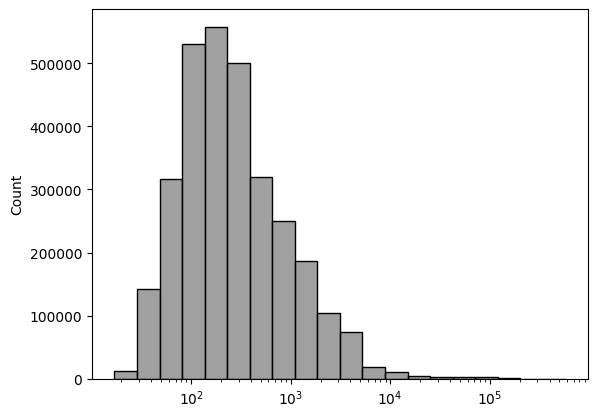

In [12]:
sns.histplot(lengths, bins=20, log_scale=True, color="grey")

In [36]:
enc = tiktoken.encoding_for_model("gpt-3.5-turbo-1106")
qs = read_trec_queries("../rel_files/queries.txt")
query_length = max([len(enc.encode(q)) for q in qs.values()]) + len(enc.encode("Topic: ''\nTable: ```\n\n```\nRelevant?"))

In [14]:
params = config("../database.ini")
conn, cur = connect(params["postgres"])
tables = get_tables_from_qrels(conn, cur, "../rel_files/rel_table_qrels.txt")

Connected to postgres


In [18]:
enc = tiktoken.encoding_for_model("gpt-3.5-turbo-16k-2138")
table_l = [len(enc.encode(json.dumps(t.table.relation))) for t in tables]

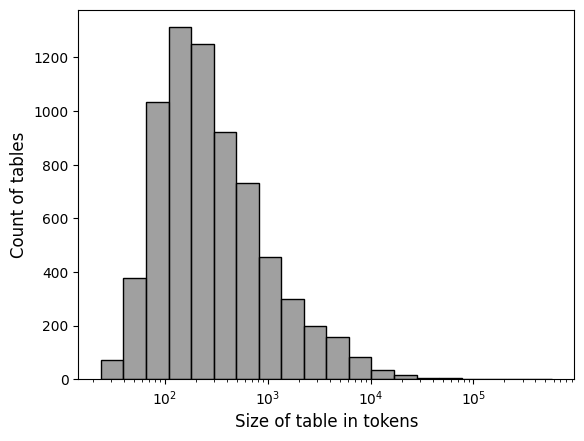

In [37]:
sns.histplot(table_l, bins=20, log_scale=True, color="grey")
plt.xlabel("Size of table in tokens", size=12)
plt.ylabel("Count of tables", size=12)
plt.show()

In [21]:
tables_l_sort = sorted(table_l)

In [40]:
tables_l_sort[round(len(tables_l_sort) / 2) +1] * (0.003 / 1000) * 6949

4.9615860000000005

In [44]:
sum(tables_l_sort) / len(tables_l_sort)  * (0.003 / 1000) * 6949

18.454752

In [41]:
round(len(tables_l_sort)/2)

3474

In [32]:
tables_l_sort[3474]

238